## Stability plots in the habit persistence model

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
from projection_code.abel_model import AbelModel
from matplotlib import cm

In [23]:
γ = 2.5

def compute_fig_matrices(x0, m, beta_vals, sigma_vals):
    R_calin = np.empty((m, m))
    R_sr = np.empty((m, m))

    for i, β in enumerate(beta_vals):
        for j, σ in enumerate(sigma_vals):
            ab = AbelModel(β=β, σ=σ, γ=γ, x0=x0, ρ=-0.14)
            R_calin[i, j] = ab.calin_test()
            R_sr[i, j] = ab.spec_rad_analytic()
            
    return R_calin, R_sr

In [24]:

x0 = 0.005
m = 25
beta_vals = np.linspace(0.4, 0.99, m)
sigma_vals = np.linspace(0.001, 0.6, m)
    
R_calin, R_sr = compute_fig_matrices(x0, m, beta_vals, sigma_vals)

Now plot:

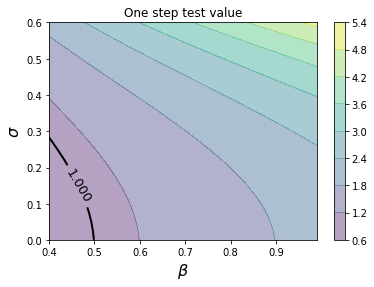

In [25]:
fig, ax = plt.subplots()


cs1 = ax.contourf(beta_vals, 
            sigma_vals, 
            R_calin.T,
            alpha=0.4)

ctr1 = ax.contour(beta_vals, sigma_vals, R_calin.T, levels=[1.0], colors='k', linewidths=2)
plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax.set_title(r'One step test value'.format(x0))
ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel(r'$\sigma$', fontsize=16)


plt.savefig("abel_calin.pdf")
plt.show()

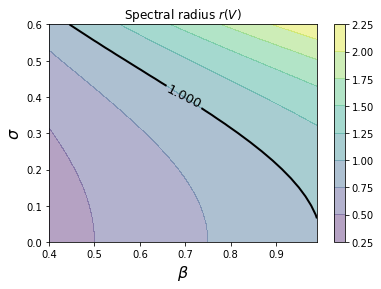

In [26]:
fig, ax = plt.subplots()



cs2 = ax.contourf(beta_vals, 
            sigma_vals, 
            R_sr.T,
            alpha=0.4)

ctr2 = ax.contour(beta_vals, sigma_vals, R_sr.T, levels=[1.0], colors='k', linewidths=2)
plt.clabel(ctr2, inline=1, fontsize=13)
plt.colorbar(cs2)

ax.set_title(r'Spectral radius $r(V)$')
ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel(r'$\sigma$', fontsize=16)


plt.savefig("abel_spec_rad.pdf")
plt.show()